This notebook is an example of using the Particles class in particles.py to read, process, and plot data from .lis files.

In [1]:
import numpy as np
import glob
from tqdm import tqdm

import particles as part
import cartographic as cart

plotting_movies = False

if not plotting_movies:
     # WARNING: movie plots will not work in parallel if matplotlib is imported before plot_Ekin_distribution_movie
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

In [2]:
# path to folder containing the .lis files
datapath = '/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2-particles/bin/test022_VL-SR-MPI_2D_rand/joined_lis/'

filenames = sorted(glob.glob(datapath + '*.lis'))

particles = part.Particles(relativistic=False)
for filename in tqdm(filenames):
    particles.add_snapshot(filename, verbose=False)
    
particles.sort()

100%|██████████| 6668/6668 [00:00<00:00, 57821.61it/s]


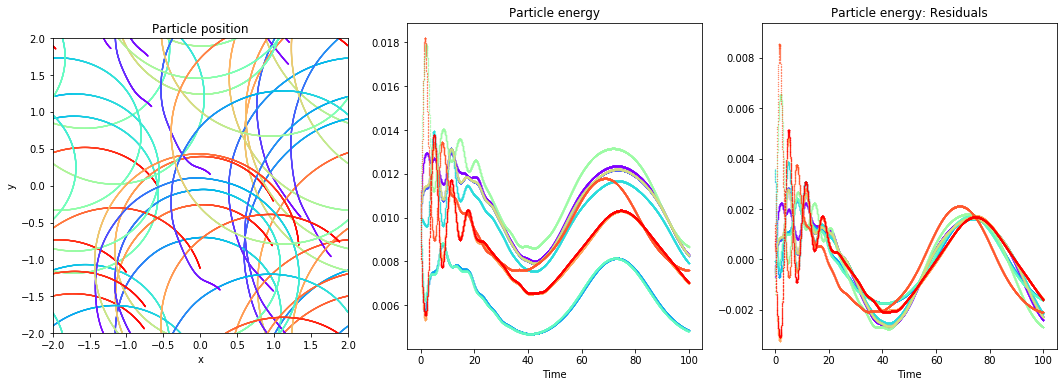

In [3]:
if not plotting_movies:
    
    fig = plt.figure(figsize=(18,6))
    gs = gridspec.GridSpec(1,3)

    plt.subplot(gs[0,0])
    particles.plot_pos2D(plt.gca(), color_by='time')

    particles.update_aux_data()

    plt.subplot(gs[0,1])
    particles.plot_Ekin_vs_time(plt.gca())

    plt.subplot(gs[0,2])
    particles.plot_Ekin_vs_time(plt.gca(), residuals=True)

    plt.show()
    plt.close()

100%|██████████| 67/67 [00:00<00:00, 430.82it/s]


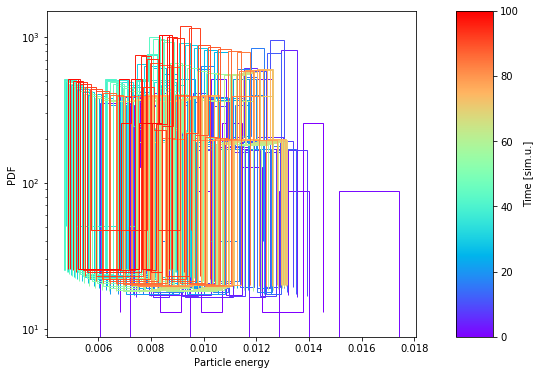

In [4]:
if not plotting_movies:
    fig = plt.figure(figsize=[8,6])
    gs = gridspec.GridSpec(1,2, width_ratios=[1,0.1])

    plt.subplot(gs[0,0])
    particles.plot_Ekin_distribution(plt.gca(), average=False, navg=100, cax=plt.subplot(gs[0,1]))

    plt.show()
    plt.close()

/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2-particles/vis/particle/particles.py:307: RuntimeWarning: divide by zero encountered in true_divide
  self.vel_theta = np.arctan(vel_xy/vel[:,:,2])
/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2-particles/vis/particle/particles.py:307: RuntimeWarning: invalid value encountered in arctan
  self.vel_theta = np.arctan(vel_xy/vel[:,:,2])


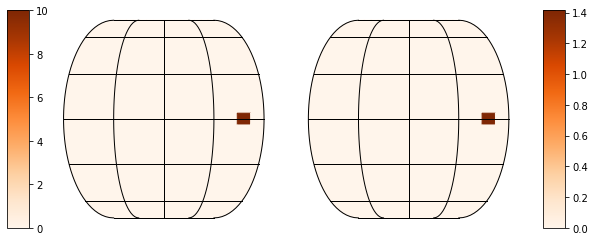

In [5]:
# single frame
fig = plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1,4, width_ratios=(0.1,1,1,0.1))

plt.subplot(gs[0,1])
particles.plot_direction_distribution(plt.gca(), cart.projection_EckertIV, 8, i=0, cax=plt.subplot(gs[0,0]), cmap='Oranges')

plt.subplot(gs[0,2])
particles.plot_direction_distribution(plt.gca(), cart.projection_EckertIV, 8, i=0, cax=plt.subplot(gs[0,3]), weights='mom', recalculate=False, cmap='Oranges')

plt.show()
plt.close()

/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2-particles/vis/particle/particles.py:307: RuntimeWarning: divide by zero encountered in true_divide
  self.vel_theta = np.arctan(vel_xy/vel[:,:,2])
/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2-particles/vis/particle/particles.py:307: RuntimeWarning: invalid value encountered in arctan
  self.vel_theta = np.arctan(vel_xy/vel[:,:,2])


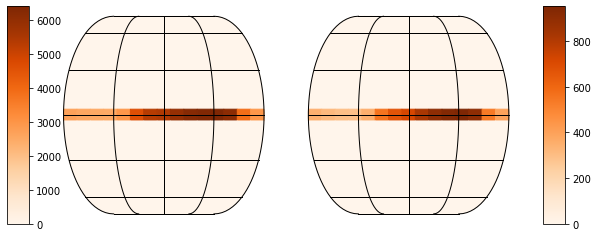

In [8]:
# single statistics for all time steps
fig = plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1,4, width_ratios=(0.1,1,1,0.1))

plt.subplot(gs[0,1])
particles.plot_direction_distribution(plt.gca(), cart.projection_EckertIV, 8, cax=plt.subplot(gs[0,0]), cmap='Oranges')

plt.subplot(gs[0,2])
particles.plot_direction_distribution(plt.gca(), cart.projection_EckertIV, 8, cax=plt.subplot(gs[0,3]), weights='mom', recalculate=False, cmap='Oranges')

plt.show()
plt.close()

In [6]:
# WARNING: movie plots will not work in parallel if matplotlib is imported before calling this function!
#  - if plt is loaded, you will (sadly... :/) need to restart the kernel or use a separate session to call this function
if plotting_movies:
    particles.plot_Ekin_distribution_movie(nproc=8, navg=100, force=True, xmin=0.005, xmax=0.02)